# Решение задачи кластеризации генетическими алгоритмами

In [ ]:
import random as random # Импортируем библиотку генерации случайных значений
import numpy as np # Импортируем библиотеку numpy
import matplotlib.pyplot as plt # Импортируем модуль pyplot библиотеки matplotlib
import matplotlib.colors as colors # Импортируем модуль colors библиотеки matplotlib
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')

# Статический вывод графики (графики отображаются в той ячейке, в которой используется plt.show())
%matplotlib inline 

In [ ]:
'''
    Функция получения выжившей популяции
        Входные параметры:
        - popul - наша популяция
        - val - текущие значения
        - nsurv - количество выживших
        - reverse - указываем требуемую операцию поиска результата: максимизация или минимизация
'''
def getSurvPopul(
        popul,
        val,
        nsurv,
        reverse
        ):
    newpopul = [] # Двумерный массив для новой популяции
    sval = sorted(val, reverse=reverse) # Сортируем зачения в val в зависимости от параметра reverse    
    for i in range(nsurv): # Проходимся по циклу nsurv-раз (в итоге в newpopul запишется nsurv-лучших показателей)
        index = val.index(sval[i]) # Получаем индекс i-того элемента sval в исходном массиве val
        newpopul.append(popul[index]) # В новую папуляцию добавляем элемент из текущей популяции с найденным индексом
    return newpopul, sval # Возвращаем новую популяцию (из nsurv элементов) и сортированный список

'''
    Функция получения родителей
        Входные параметры:
        - curr_popul - текущая популяция
        - nsurv - количество выживших
'''
def getParents(
        curr_popul,
        nsurv
        ):   
    indexp1 = random.randint(0, nsurv - 1) # Случайный индекс первого родителя в диапазоне от 0 до nsurv - 1
    indexp2 = random.randint(0, nsurv - 1) # Случайный индекс второго родителя в диапазоне от 0 до nsurv - 1    
    botp1 = curr_popul[indexp1] # Получаем первого бота-родителя по indexp1
    botp2 = curr_popul[indexp2] # Получаем второго бота-родителя по indexp2    
    return botp1, botp2 # Возвращаем обоих полученных ботов

'''
    Функция смешивания (кроссинговера) двух родителей
        Входные параметры:
        - botp1 - первый бот-родитель
        - botp2 - второй бот-родитель
        - j - номер компонента бота
'''
def crossPointFrom2Parents(
        botp1,
        botp2, 
        j
        ):
    pindex = random.random() # Получаем случайное число в диапазоне от 0 до 1
    
    # Если pindex меньше 0.5, то берем значения от первого бота, иначе от второго
    if pindex < 0.5:
        x = botp1[j]
    else:
        x = botp2[j]
    return x # Возвращаем значние бота

#Создаем кластеры точек и рисуем их

In [ ]:
N = 10  #Всего по N точек каждого клстера точек

#Координаты трех областей

x1 = np.random.randn(N)+3
y1 = np.random.randn(N)+3
x2 = np.random.randn(N)-3
y2 = np.random.randn(N)+3
x3 = np.random.randn(N)
y3 = np.random.randn(N)-2
x = np.concatenate((x1,x2,x3))
y = np.concatenate((y1,y2,y3))
metka = np.concatenate((np.ones(N, dtype = 'int32'), np.ones(N, dtype = 'int32')*2, np.ones(N, dtype = 'int32')*3))
df = pd.DataFrame({'x':x,'y':y, 'metka':metka})
df = df.sample(frac=1) 
df = df.reset_index().drop('index', axis=1)
df['ga'] = np.random.randint(1,4,N*3)
df

,x,y,metka,ga
0,-1.611988,-2.331540,3,3
1,3.042562,1.703272,1,2
2,0.433115,-4.186352,3,3
3,-1.527636,3.551284,2,3
4,-0.702251,-1.339966,3,2
5,-4.419702,2.526531,2,3
6,-2.790088,1.375045,2,2
7,3.060665,3.270289,1,2
8,0.408364,-1.283537,3,2
9,3.901216,2.754928,1,3


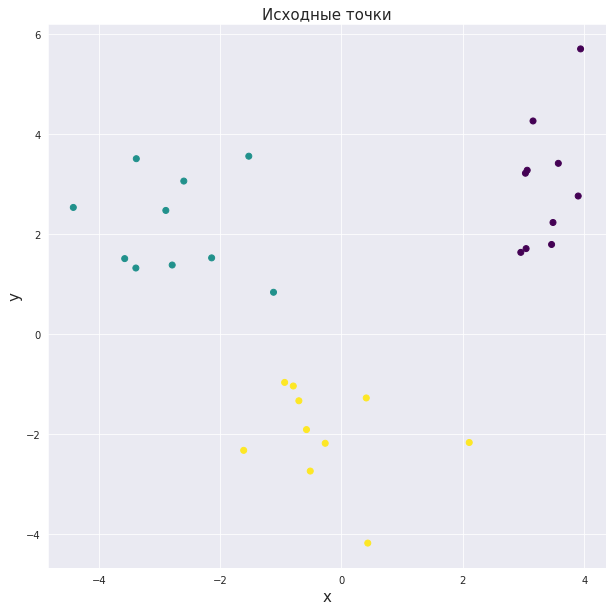

In [ ]:
plt.figure(figsize = (10,10))
plt.scatter(df.x, df.y, c=df.metka, cmap = 'viridis')
#plt.legend()
plt.title('Исходные точки', size=15)
plt.xlabel('x', size=15)
plt.ylabel('y', size=15)
plt.show()

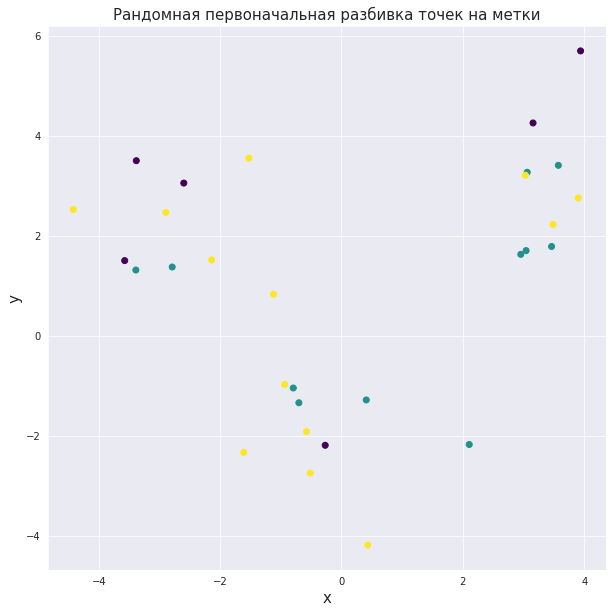

In [ ]:
plt.figure(figsize = (10,10))
plt.scatter(df.x, df.y, c=df.ga, cmap = 'viridis')
#plt.legend()
plt.title('Рандомная первоначальная разбивка точек на метки', size=15)
plt.xlabel('x', size=15)
plt.ylabel('y', size=15)
plt.show()

#Расчет генетического алгоритма

In [ ]:
#Функция для вычисления суммы расстояний каждого класса в дата фрейме. Эту функцию будем минимизировать
def dist(df1):
    
    S = 0
    for k in [1,2,3]:
      temp = df1[df1.ga==k]
      
      rasst = 0
      for i in range(temp.shape[0]-1):
          for j in range(i+1,temp.shape[0]-1):
              
              rasst = rasst + ((temp.iloc[i,:][0] - temp.iloc[j,:][0])**2 + (temp.iloc[i,:][1] - temp.iloc[j,:][1])**2)**0.5
      S = S + rasst/temp.shape[0]   #Суммарная ошибка, нормированная на каждую точку множества
    return S


In [ ]:
#функция мутации с вероятностью mut изменяет элемент:
def mut_fun(x,mut):
    if random.random()<=mut:
        x = np.random.randint(1,4,1)[0]
    return x


In [ ]:
res=[]
n = 80 # Размер популяции
nsurv = int(n/5) # Количество выживших (столько лучших переходит в новую популяцию)
nnew = n - nsurv # Количество новых (столько новых ботов создается)
l = N*3 # Длина бота
epohs = 120 # Количество эпох

mut = 0.25 # Коэфициент мутаций

popul = []
val = [] 

for i in range(n): 
    popul.append(np.random.randint(1,4,N*3)) 
    

for it in range(epohs): # Пробегаемся по всем эпохам
    val = [] # Создаем пустой список для значений ботов

    for i in range(n): # Проходим по всей длине популяции
        bot = popul[i] # Берем очередного бота
        df['ga'] = bot
    
        f = dist(df)
        val.append(abs(f))   # в этой задаче будем искать 0 функции
                         
    
    newpopul, sval = getSurvPopul(popul, val, nsurv, 0) # Получаем новую популяцию и сортированный список значнией
    res.append(sval[0])
    print(it, " ", [round(s,8) for s in sval[0:5]]) # Выводим 5 лучших ботов
    

    for i in range(nnew): # Проходимся в цикле nnew-раз 
        botp1, botp2 = getParents(newpopul, nsurv) # Из newpopul(новой популяции) получаем двух случайных родителей-ботов
        newbot = [] # Массив для нового бота
        # проходимся по длине бота и осуществляем смешивание/скрещивание от родителей
        for j in range(l): # Проходим по всей длине бота
            x = crossPointFrom2Parents(botp1, botp2, j) # Получаем значение для j-ого компонента бота
            x  = mut_fun(x,mut)
            newbot.append(x) # Добавялем новое значение в бота      
        newpopul.append(newbot) # Добавляем бота в новую популяцию 
        #(таким образом к nsurv-лучших ботов предыдующей популяции добавится nnew-новых ботов)
    
    popul = newpopul # Записываем в popul посчитанную новую популяцию


0   [44.37086777, 44.49592221, 45.13839243, 45.26608939, 45.28543302]
1   [39.8976769, 41.27428375, 42.03941124, 42.24237228, 43.21930397]
2   [38.34830145, 39.34198143, 39.37452798, 39.8976769, 41.27428375]
3   [36.00766391, 36.31864683, 36.35823342, 38.34830145, 39.03846154]
4   [36.00766391, 36.31864683, 36.35823342, 37.26465879, 37.7465933]
5   [35.52768427, 35.89300201, 36.00766391, 36.31864683, 36.35823342]
6   [31.69106158, 35.52768427, 35.75632678, 35.89300201, 36.00766391]
7   [31.20106112, 31.69106158, 34.39627006, 35.52768427, 35.67535506]
8   [31.20106112, 31.69106158, 34.39627006, 35.47323128, 35.52768427]
9   [31.20106112, 31.69106158, 32.36014004, 32.45850804, 34.26373164]
10   [29.31358368, 29.75896867, 31.20106112, 31.69106158, 32.36014004]
11   [29.31358368, 29.75896867, 30.56351333, 30.70711406, 31.20106112]
12   [29.31358368, 29.75896867, 30.56351333, 30.70711406, 31.20106112]
13   [28.69370584, 29.31358368, 29.41007964, 29.55987586, 29.75896867]
14   [28.69370584, 

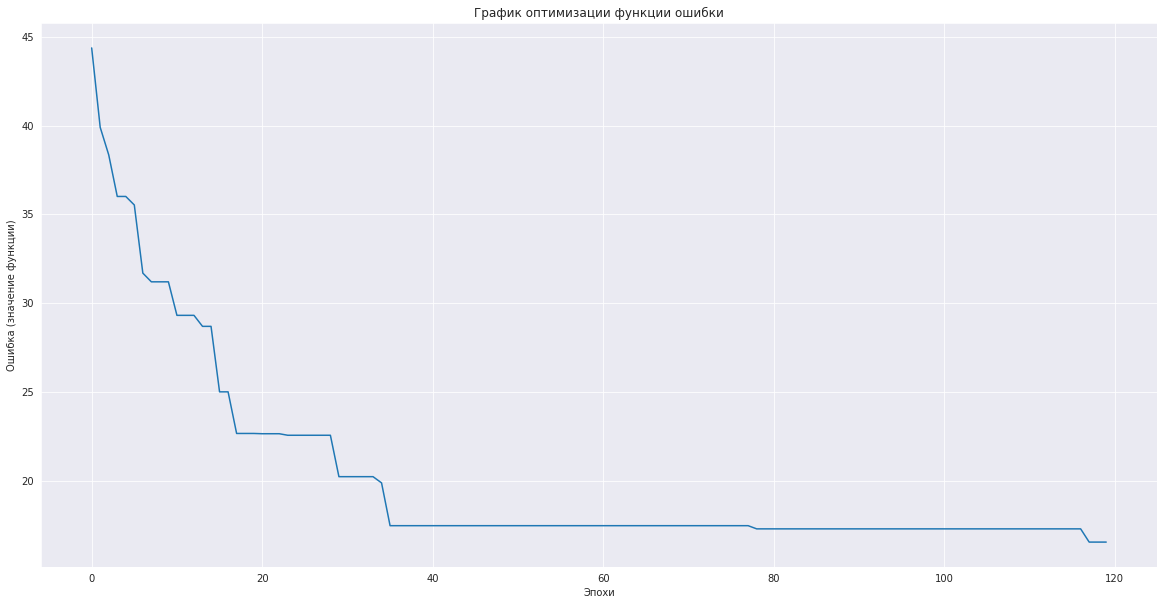

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(res)
plt.title('График оптимизации функции ошибки')
plt.xlabel('Эпохи')
plt.ylabel('Ошибка (значение функции)')
plt.show()

In [ ]:
bestbot = popul[0]
df['ga'] = bestbot

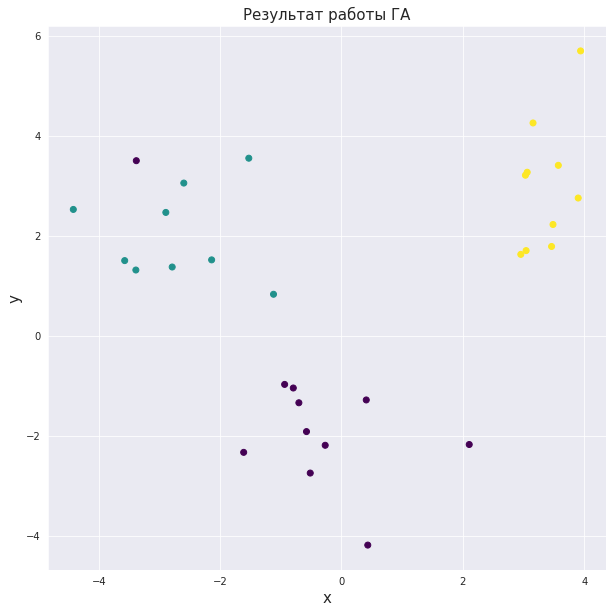

In [ ]:
plt.figure(figsize = (10,10))
plt.scatter(df.x, df.y, c=df.ga, cmap = 'viridis')
#plt.legend()
plt.title('Результат работы ГА', size=15)
plt.xlabel('x', size=15)
plt.ylabel('y', size=15)
plt.show()

#Вывод. Взял 3 кластера по 10 точек. Написал функцию ошибки как сумма расстояний внутри каждого кластера и потом суммировал их для всех трех кластеров. Мутацию сделал просто рандомной, посколкьу у нас не может быть промежуточнеых зхначений, а всего 3 1,2,3. 